# Lab Models for Regression and Classification

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV



## Regression models - new metrics

TCH

In [61]:
tch_df = pd.read_csv("dfHS_newmetrics_TCH.csv")
sac_df = pd.read_csv("dfHS_newmetrics_SacCana.csv")

In [62]:
# Para TCH
X_tch = tch_df.drop(columns=['TCH'])
y_tch = tch_df['TCH']

# Para %Sac.Caña
X_sac = sac_df.drop(columns=['%Sac.Caña'])
y_sac = sac_df['%Sac.Caña']

In [63]:
X_tch_train, X_tch_test, y_tch_train, y_tch_test = train_test_split(X_tch, y_tch, test_size=0.2, random_state=42)
X_sac_train, X_sac_test, y_sac_train, y_sac_test = train_test_split(X_sac, y_sac, test_size=0.2, random_state=42)

In [64]:
model_tch = LinearRegression().fit(X_tch_train, y_tch_train)
model_sac = LinearRegression().fit(X_sac_train, y_sac_train)

In [65]:
X_tch_sm = sm.add_constant(X_tch)  # Agregar constante
model_sm_tch = sm.OLS(y_tch, X_tch_sm).fit()
print(model_sm_tch.summary())

X_sac_sm = sm.add_constant(X_sac)
model_sm_sac = sm.OLS(y_sac, X_sac_sm).fit()
print(model_sm_sac.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     5163.
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        05:52:02   Log-Likelihood:                -16648.
No. Observations:                4530   AIC:                         3.331e+04
Df Residuals:                    4521   BIC:                         3.337e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2688.39

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predicciones
y_tch_pred = model_tch.predict(X_tch_test)
y_sac_pred = model_sac.predict(X_sac_test)

# Función de evaluación
def evaluar_modelo(y_test, y_pred):
    print("R²:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))

# Evaluación de ambos modelos
print("Evaluación TCH:")
evaluar_modelo(y_tch_test, y_tch_pred)

print("\nEvaluación %Sac.Caña:")
evaluar_modelo(y_sac_test, y_sac_pred)


Evaluación TCH:
R²: 0.9162326479461371
RMSE: 8.120149756298488
MAE: 5.3700953017583934

Evaluación %Sac.Caña:
R²: 0.9773971033646461
RMSE: 0.16071516139925832
MAE: 0.10145979538450205


In [67]:
cv_r2_tch = cross_val_score(model_tch, X_tch, y_tch, cv=5, scoring='r2')
cv_rmse_tch = -cross_val_score(model_tch, X_tch, y_tch, cv=5, scoring='neg_root_mean_squared_error')

cv_r2_sac = cross_val_score(model_sac, X_sac, y_sac, cv=5, scoring='r2')
cv_rmse_sac = -cross_val_score(model_sac, X_sac, y_sac, cv=5, scoring='neg_root_mean_squared_error')
print("Validación Cruzada TCH")
print("Cross-validated R²:", np.mean(cv_r2_tch))
print("Cross-validated RMSE:", np.mean(cv_rmse_tch))
print("Validación Cruzada %Sac.Caña")
print("Cross-validated R²:", np.mean(cv_r2_sac))
print("Cross-validated RMSE:", np.mean(cv_rmse_sac))


Validación Cruzada TCH
Cross-validated R²: 0.8810113453796777
Cross-validated RMSE: 9.976117562182681
Validación Cruzada %Sac.Caña
Cross-validated R²: 0.965421583862403
Cross-validated RMSE: 0.21000413500947768


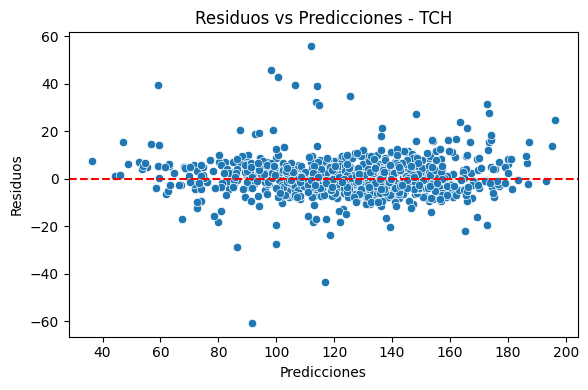

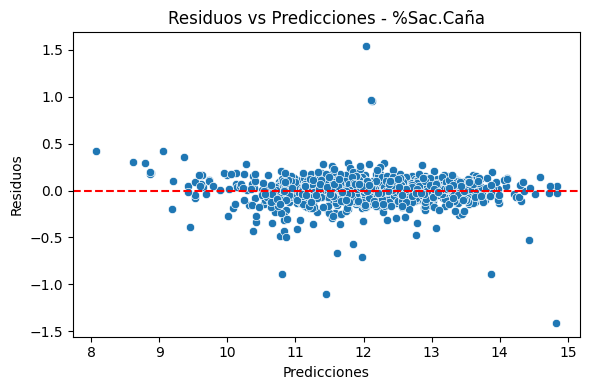

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def diagnostico_linealidad(y_test, y_pred, nombre):
    residuos = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_pred, y=residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicciones")
    plt.ylabel("Residuos")
    plt.title(f"Residuos vs Predicciones - {nombre}")
    plt.tight_layout()
    plt.show()

# TCH
diagnostico_linealidad(y_tch_test, y_tch_pred, "TCH")

# %Sac.Caña
diagnostico_linealidad(y_sac_test, y_sac_pred, "%Sac.Caña")


In [69]:
from statsmodels.stats.stattools import durbin_watson

# TCH
dw_tch = durbin_watson(y_tch_test - y_tch_pred)
print("Durbin-Watson para TCH:", dw_tch)

# %Sac.Caña
dw_sac = durbin_watson(y_sac_test - y_sac_pred)
print("Durbin-Watson para %Sac.Caña:", dw_sac)


Durbin-Watson para TCH: 1.9704802500064673
Durbin-Watson para %Sac.Caña: 1.9438258929020251


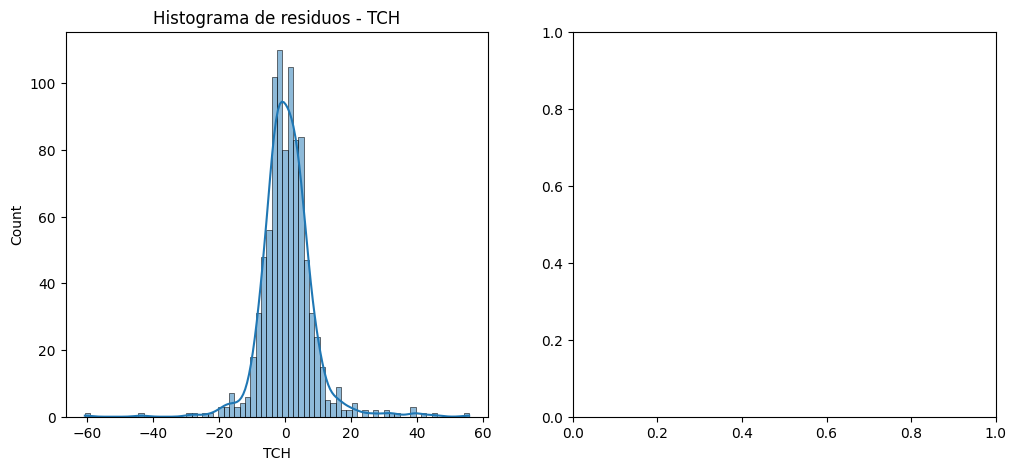

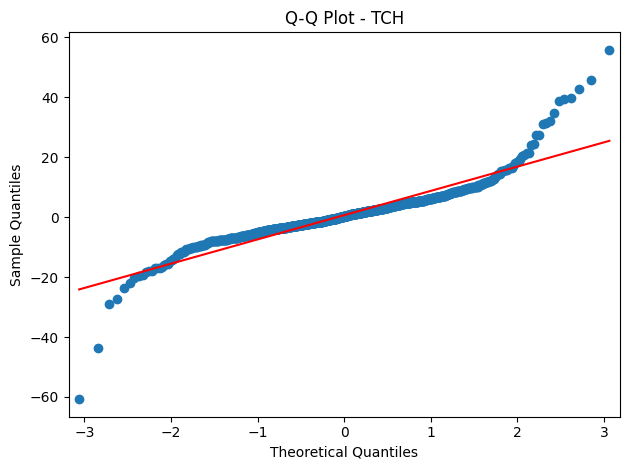

Shapiro-Wilk para TCH: p-value = 0.0000


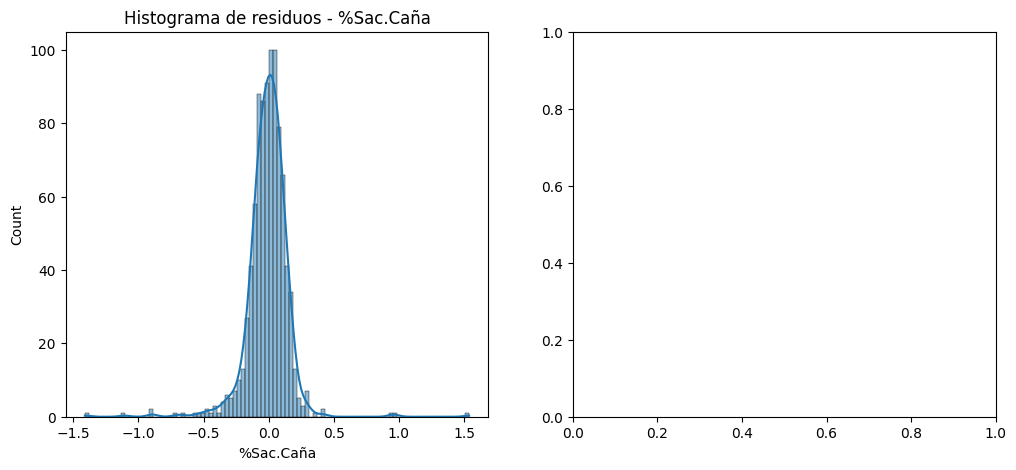

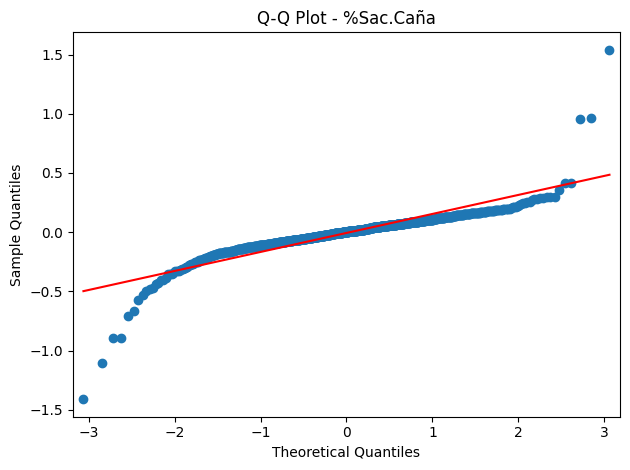

Shapiro-Wilk para %Sac.Caña: p-value = 0.0000


In [70]:
import scipy.stats as stats
import statsmodels.api as sm

def diagnostico_normalidad(y_test, y_pred, nombre):
    residuos = y_test - y_pred
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(residuos, kde=True)
    plt.title(f"Histograma de residuos - {nombre}")

    # Q-Q plot
    plt.subplot(1, 2, 2)
    sm.qqplot(residuos, line='s')
    plt.title(f"Q-Q Plot - {nombre}")

    plt.tight_layout()
    plt.show()

    # Test de normalidad
    stat, p = stats.shapiro(residuos)
    print(f"Shapiro-Wilk para {nombre}: p-value = {p:.4f}")

# TCH
diagnostico_normalidad(y_tch_test, y_tch_pred, "TCH")

# %Sac.Caña
diagnostico_normalidad(y_sac_test, y_sac_pred, "%Sac.Caña")


In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calcular_vif(X, nombre):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(f"\nVIF - {nombre}")
    print(vif_data)

# TCH
calcular_vif(X_tch_train, "TCH")

# %Sac.Caña
calcular_vif(X_sac_train, "%Sac.Caña")



VIF - TCH
                Variable         VIF
0                Período  708.979849
1             Ton.Azucar    3.324281
2                   %ATR  149.611654
3                 KATRHM   24.896903
4               M3 Riego    1.520861
5  Radiacion Solar Ciclo  999.634462
6        Evaporacion 0-3  192.415011
7      Evaporacion Ciclo   49.040358

VIF - %Sac.Caña
                  Variable         VIF
0                  Dist Km    3.613644
1           Cod. T.Cultivo   22.677483
2          Dosis Madurante    3.143726
3                     TCHM   86.823859
4                     TAHM   98.276054
5        %Sac.Muestreadora  131.225951
6                     %ATR  111.030400
7                 %AR Jugo   14.921097
8                  %ME Veg   52.554254
9                  %ME Tot   67.641930
10  Lluvias (2 Meses Ant.)    3.834881
11     Lluvias tres a seis    4.365185
12    Lluvias seis a nueve    4.853403


In [72]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"\n🔍 Evaluación {nombre}:")
    print("R²:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))

    # Validación cruzada R²
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='r2')
    print("Cross-validated R²:", scores.mean())

    # Validación cruzada RMSE
    rmse_scores = np.sqrt(-cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    print("Cross-validated RMSE:", rmse_scores.mean())

# Preparamos los modelos con escalado automático
model_lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42))
model_ridge = make_pipeline(StandardScaler(), RidgeCV(cv=5))

# Entrenamiento y evaluación TCH
evaluar_modelo("TCH - Lasso", model_lasso, X_tch_train, X_tch_test, y_tch_train, y_tch_test)
evaluar_modelo("TCH - Ridge", model_ridge, X_tch_train, X_tch_test, y_tch_train, y_tch_test)

# Entrenamiento y evaluación %Sac.Caña
evaluar_modelo("%Sac.Caña - Lasso", model_lasso, X_sac_train, X_sac_test, y_sac_train, y_sac_test)
evaluar_modelo("%Sac.Caña - Ridge", model_ridge, X_sac_train, X_sac_test, y_sac_train, y_sac_test)



🔍 Evaluación TCH - Lasso:
R²: 0.9162925282647897
RMSE: 8.117246930378856
MAE: 5.371705368879524
Cross-validated R²: 0.8969373771941495
Cross-validated RMSE: 9.876171614221311

🔍 Evaluación TCH - Ridge:
R²: 0.9162315641575859
RMSE: 8.120202285694843
MAE: 5.37007538448598
Cross-validated R²: 0.8969880521032036
Cross-validated RMSE: 9.87357000681513

🔍 Evaluación %Sac.Caña - Lasso:
R²: 0.9772551851802391
RMSE: 0.1612189179333954
MAE: 0.10138882072059856
Cross-validated R²: 0.9638946591714822
Cross-validated RMSE: 0.21906746899177074

🔍 Evaluación %Sac.Caña - Ridge:
R²: 0.9773970417152947
RMSE: 0.1607153805742356
MAE: 0.10147219022308539
Cross-validated R²: 0.9638780344470851
Cross-validated RMSE: 0.2191842626183805


Elastic Net

In [73]:
# Separación train/test para TCH
X_tch_train, X_tch_test, y_tch_train, y_tch_test = train_test_split(X_tch, y_tch, test_size=0.2, random_state=42)

# Separación train/test para Sac.Caña
X_sac_train, X_sac_test, y_sac_train, y_sac_test = train_test_split(X_sac, y_sac, test_size=0.2, random_state=42)

# Escalado
scaler_tch = StandardScaler()
X_tch_train_scaled = scaler_tch.fit_transform(X_tch_train)
X_tch_test_scaled = scaler_tch.transform(X_tch_test)

scaler_sac = StandardScaler()
X_sac_train_scaled = scaler_sac.fit_transform(X_sac_train)
X_sac_test_scaled = scaler_sac.transform(X_sac_test)

In [74]:
# Modelos
alphas = np.logspace(-3, 3, 100)

ridge_tch = RidgeCV(alphas=alphas, cv=5).fit(X_tch_train_scaled, y_tch_train)
lasso_tch = LassoCV(alphas=alphas, cv=5, max_iter=10000).fit(X_tch_train_scaled, y_tch_train)
elastic_tch = ElasticNetCV(alphas=alphas, l1_ratio=[.1, .5, .9, .95, .99, 1], cv=5, max_iter=10000).fit(X_tch_train_scaled, y_tch_train)

ridge_sac = RidgeCV(alphas=alphas, cv=5).fit(X_sac_train_scaled, y_sac_train)
lasso_sac = LassoCV(alphas=alphas, cv=5, max_iter=10000).fit(X_sac_train_scaled, y_sac_train)
elastic_sac = ElasticNetCV(alphas=alphas, l1_ratio=[.1, .5, .9, .95, .99, 1], cv=5, max_iter=10000).fit(X_sac_train_scaled, y_sac_train)


In [75]:
def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f"--- {nombre} ---")
    print("R²:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print()

# Evaluación TCH
evaluar_modelo("Ridge - TCH", ridge_tch, X_tch_test_scaled, y_tch_test)
evaluar_modelo("Lasso - TCH", lasso_tch, X_tch_test_scaled, y_tch_test)
evaluar_modelo("ElasticNet - TCH", elastic_tch, X_tch_test_scaled, y_tch_test)

# Evaluación Sac.Caña
evaluar_modelo("Ridge - Sac", ridge_sac, X_sac_test_scaled, y_sac_test)
evaluar_modelo("Lasso - Sac", lasso_sac, X_sac_test_scaled, y_sac_test)
evaluar_modelo("ElasticNet - Sac", elastic_sac, X_sac_test_scaled, y_sac_test)


--- Ridge - TCH ---
R²: 0.9162297619569173
RMSE: 8.120289634557997
MAE: 5.370042396022629

--- Lasso - TCH ---
R²: 0.9162354187372604
RMSE: 8.120015459198429
MAE: 5.370142110852544

--- ElasticNet - TCH ---
R²: 0.9162354187372604
RMSE: 8.120015459198429
MAE: 5.370142110852544

--- Ridge - Sac ---
R²: 0.9773962527191058
RMSE: 0.1607181855768952
MAE: 0.10149642203162952

--- Lasso - Sac ---
R²: 0.9772726144557163
RMSE: 0.16115713533654383
MAE: 0.10140781371722063

--- ElasticNet - Sac ---
R²: 0.9773216576723683
RMSE: 0.16098316168027543
MAE: 0.10145023573222015



In [76]:
import pandas as pd

print("Coeficientes Lasso - TCH:")
print(pd.Series(lasso_tch.coef_, index=X_tch.columns))

print("\nCoeficientes Lasso - Sac:")
print(pd.Series(lasso_sac.coef_, index=X_sac.columns))

Coeficientes Lasso - TCH:
Período                  -0.938023
Ton.Azucar                0.566763
%ATR                    -10.464857
KATRHM                   28.599171
M3 Riego                 -0.213154
Radiacion Solar Ciclo    -4.377437
Evaporacion 0-3          -2.709188
Evaporacion Ciclo        14.740099
dtype: float64

Coeficientes Lasso - Sac:
Dist Km                   0.001624
Cod. T.Cultivo            0.010881
Dosis Madurante           0.032787
TCHM                     -0.025695
TAHM                      0.026313
%Sac.Muestreadora        -0.000000
%ATR                      1.094773
%AR Jugo                 -0.114491
%ME Veg                   0.034813
%ME Tot                  -0.020223
Lluvias (2 Meses Ant.)   -0.002499
Lluvias tres a seis       0.000000
Lluvias seis a nueve     -0.000000
dtype: float64


✅ Conclusión TCH:

Lasso no eliminó variables por completo, pero sí penalizó fuertemente a algunas.

Como todas las variables quedaron activas, Ridge o incluso el modelo lineal clásico ya es suficiente.

Pero si querés controlar multicolinealidad, quédate con Ridge.

🔹 Modelo recomendado: Ridge
🔹 Variables: todas las actuales (Lasso no eliminó ninguna)





✅ Conclusión Sac.Caña:

Se eliminaron 3 variables sin pérdida significativa de desempeño.

❌ Eliminadas por Lasso:

%Sac.Muestreadora

Lluvias tres a seis

Lluvias seis a nueve

Lasso logra parsimonia con mismo poder predictivo.

🔹 Modelo recomendado: Lasso
🔹 Variables finales: Dist Km, Cod. T.Cultivo, Dosis Madurante, TCHM, TAHM, %ATR,
%AR Jugo, %ME Veg, %ME Tot, Lluvias (2 Meses Ant.)

## Regression models - no-new metrics

TCH

In [78]:
tch_df = pd.read_csv("dfHS_no_newmetrics_TCH.csv")
sac_df = pd.read_csv("dfHS_no_newmetrics_SacCana.csv")

In [79]:
# Para TCH
X_tch = tch_df.drop(columns=['TCH'])
y_tch = tch_df['TCH']

# Para %Sac.Caña
X_sac = sac_df.drop(columns=['%Sac.Caña'])
y_sac = sac_df['%Sac.Caña']

In [80]:
X_tch_train, X_tch_test, y_tch_train, y_tch_test = train_test_split(X_tch, y_tch, test_size=0.2, random_state=42)
X_sac_train, X_sac_test, y_sac_train, y_sac_test = train_test_split(X_sac, y_sac, test_size=0.2, random_state=42)

In [81]:
model_tch = LinearRegression().fit(X_tch_train, y_tch_train)
model_sac = LinearRegression().fit(X_sac_train, y_sac_train)

In [82]:
X_tch_sm = sm.add_constant(X_tch)  # Agregar constante
model_sm_tch = sm.OLS(y_tch, X_tch_sm).fit()
print(model_sm_tch.summary())

X_sac_sm = sm.add_constant(X_sac)
model_sm_sac = sm.OLS(y_sac, X_sac_sm).fit()
print(model_sm_sac.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 3.321e+04
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        05:56:32   Log-Likelihood:                -75785.
No. Observations:               21027   AIC:                         1.516e+05
Df Residuals:                   21018   BIC:                         1.517e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             527.7574     59.954     

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predicciones
y_tch_pred = model_tch.predict(X_tch_test)
y_sac_pred = model_sac.predict(X_sac_test)

# Función de evaluación
def evaluar_modelo(y_test, y_pred):
    print("R²:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))

# Evaluación de ambos modelos
print("Evaluación TCH:")
evaluar_modelo(y_tch_test, y_tch_pred)

print("\nEvaluación %Sac.Caña:")
evaluar_modelo(y_sac_test, y_sac_pred)


Evaluación TCH:
R²: 0.9347921906014216
RMSE: 8.508362966980403
MAE: 4.290344650671113

Evaluación %Sac.Caña:
R²: 0.7985405411849558
RMSE: 0.4984900263266109
MAE: 0.3481098583820248


In [84]:
cv_r2_tch = cross_val_score(model_tch, X_tch, y_tch, cv=5, scoring='r2')
cv_rmse_tch = -cross_val_score(model_tch, X_tch, y_tch, cv=5, scoring='neg_root_mean_squared_error')

cv_r2_sac = cross_val_score(model_sac, X_sac, y_sac, cv=5, scoring='r2')
cv_rmse_sac = -cross_val_score(model_sac, X_sac, y_sac, cv=5, scoring='neg_root_mean_squared_error')
print("Validación Cruzada TCH")
print("Cross-validated R²:", np.mean(cv_r2_tch))
print("Cross-validated RMSE:", np.mean(cv_rmse_tch))
print("Validación Cruzada %Sac.Caña")
print("Cross-validated R²:", np.mean(cv_r2_sac))
print("Cross-validated RMSE:", np.mean(cv_rmse_sac))


Validación Cruzada TCH
Cross-validated R²: 0.9139050806114188
Cross-validated RMSE: 9.37211383602452
Validación Cruzada %Sac.Caña
Cross-validated R²: 0.20116618841494863
Cross-validated RMSE: 0.8196008535450281


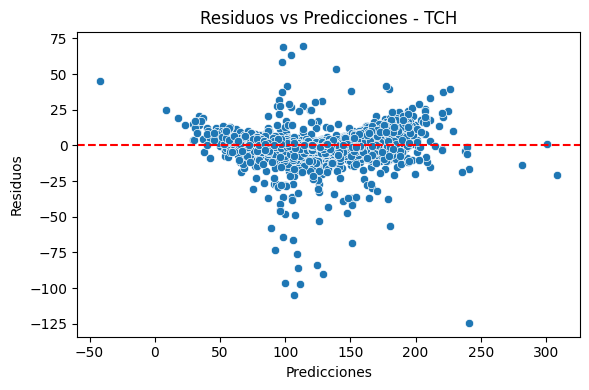

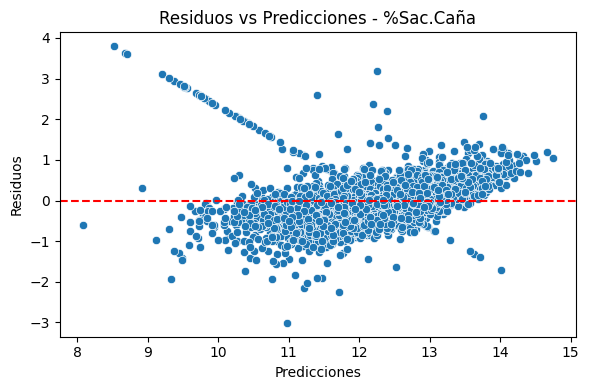

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

def diagnostico_linealidad(y_test, y_pred, nombre):
    residuos = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_pred, y=residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicciones")
    plt.ylabel("Residuos")
    plt.title(f"Residuos vs Predicciones - {nombre}")
    plt.tight_layout()
    plt.show()

# TCH
diagnostico_linealidad(y_tch_test, y_tch_pred, "TCH")

# %Sac.Caña
diagnostico_linealidad(y_sac_test, y_sac_pred, "%Sac.Caña")


In [86]:
from statsmodels.stats.stattools import durbin_watson

# TCH
dw_tch = durbin_watson(y_tch_test - y_tch_pred)
print("Durbin-Watson para TCH:", dw_tch)

# %Sac.Caña
dw_sac = durbin_watson(y_sac_test - y_sac_pred)
print("Durbin-Watson para %Sac.Caña:", dw_sac)


Durbin-Watson para TCH: 2.0483572723132903
Durbin-Watson para %Sac.Caña: 1.9972043745937997


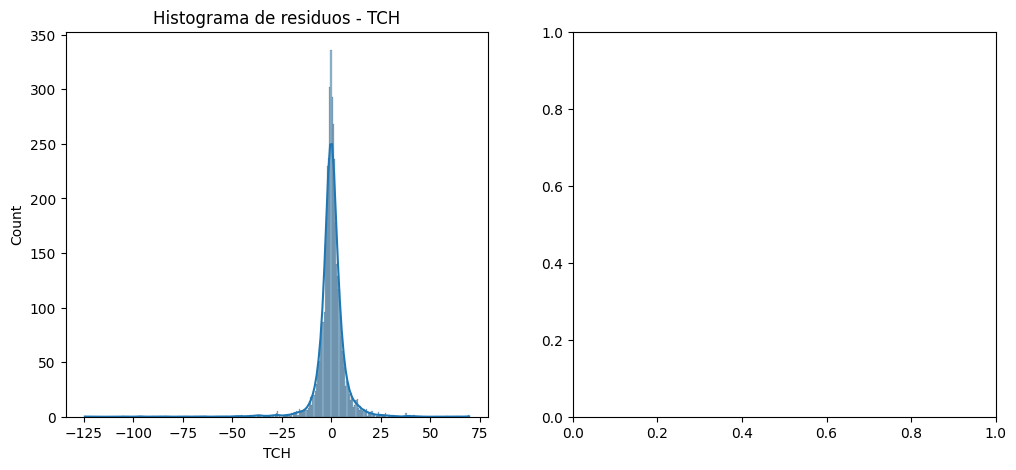

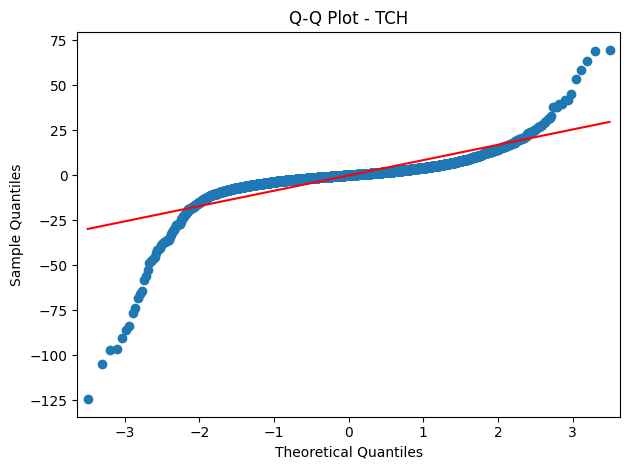

Shapiro-Wilk para TCH: p-value = 0.0000


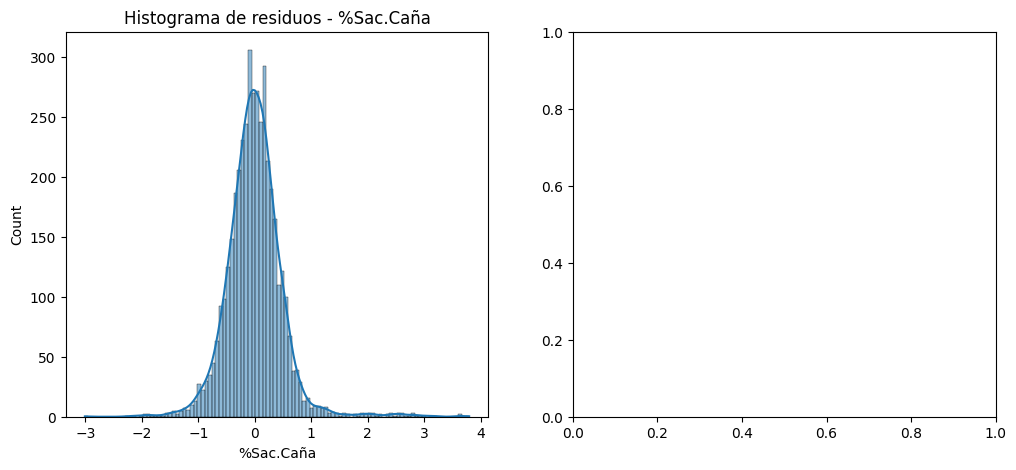

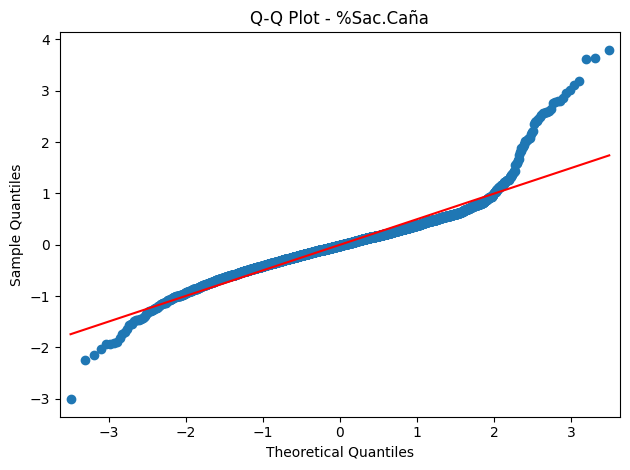

Shapiro-Wilk para %Sac.Caña: p-value = 0.0000


In [87]:
import scipy.stats as stats
import statsmodels.api as sm

def diagnostico_normalidad(y_test, y_pred, nombre):
    residuos = y_test - y_pred
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(residuos, kde=True)
    plt.title(f"Histograma de residuos - {nombre}")

    # Q-Q plot
    plt.subplot(1, 2, 2)
    sm.qqplot(residuos, line='s')
    plt.title(f"Q-Q Plot - {nombre}")

    plt.tight_layout()
    plt.show()

    # Test de normalidad
    stat, p = stats.shapiro(residuos)
    print(f"Shapiro-Wilk para {nombre}: p-value = {p:.4f}")

# TCH
diagnostico_normalidad(y_tch_test, y_tch_pred, "TCH")

# %Sac.Caña
diagnostico_normalidad(y_sac_test, y_sac_pred, "%Sac.Caña")


In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calcular_vif(X, nombre):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(f"\nVIF - {nombre}")
    print(vif_data)

# TCH
calcular_vif(X_tch_train, "TCH")

# %Sac.Caña
calcular_vif(X_sac_train, "%Sac.Caña")



VIF - TCH
          Variable         VIF
0          Período  323.979510
1     Edad Ult Cos   59.558815
2       Ton.Azucar    2.561054
3  Edad.Precosecha  195.621922
4        %Sac.Caña  260.644727
5             %ATR  199.369965
6           KATRHM   22.817610
7     Luvias 9 -FC    1.825135

VIF - %Sac.Caña
                 Variable        VIF
0          Cod. T.Cultivo  29.510446
1         Dosis Madurante   2.453645
2                    TCHM  62.929199
3                    TAHM  70.253394
4     Sac.Caña Precosecha   2.181388
5       %Sac.Muestreadora  74.380263
6                    %ATR  70.216867
7                %AR Jugo  12.698015
8  Lluvias (2 Meses Ant.)   1.785733


In [89]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"\n🔍 Evaluación {nombre}:")
    print("R²:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))

    # Validación cruzada R²
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='r2')
    print("Cross-validated R²:", scores.mean())

    # Validación cruzada RMSE
    rmse_scores = np.sqrt(-cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    print("Cross-validated RMSE:", rmse_scores.mean())

# Preparamos los modelos con escalado automático
model_lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42))
model_ridge = make_pipeline(StandardScaler(), RidgeCV(cv=5))

# Entrenamiento y evaluación TCH
evaluar_modelo("TCH - Lasso", model_lasso, X_tch_train, X_tch_test, y_tch_train, y_tch_test)
evaluar_modelo("TCH - Ridge", model_ridge, X_tch_train, X_tch_test, y_tch_train, y_tch_test)

# Entrenamiento y evaluación %Sac.Caña
evaluar_modelo("%Sac.Caña - Lasso", model_lasso, X_sac_train, X_sac_test, y_sac_train, y_sac_test)
evaluar_modelo("%Sac.Caña - Ridge", model_ridge, X_sac_train, X_sac_test, y_sac_train, y_sac_test)



🔍 Evaluación TCH - Lasso:
R²: 0.9347326157135419
RMSE: 8.51224876726137
MAE: 4.292147515767574
Cross-validated R²: 0.9150288506053755
Cross-validated RMSE: 9.456685209619941

🔍 Evaluación TCH - Ridge:
R²: 0.9347918141710702
RMSE: 8.50838752539963
MAE: 4.290371637224239
Cross-validated R²: 0.914785430125872
Cross-validated RMSE: 9.469209210775253

🔍 Evaluación %Sac.Caña - Lasso:
R²: 0.5102461041259256
RMSE: 0.7772336441920666
MAE: 0.6022010498050239
Cross-validated R²: -0.12097609805165135
Cross-validated RMSE: 1.1110112484575594

🔍 Evaluación %Sac.Caña - Ridge:
R²: 0.7983945531554169
RMSE: 0.49867060955166453
MAE: 0.34834454033035556
Cross-validated R²: 0.1383454590239392
Cross-validated RMSE: 0.8768745638207042


Elastic Net

In [90]:
# Separación train/test para TCH
X_tch_train, X_tch_test, y_tch_train, y_tch_test = train_test_split(X_tch, y_tch, test_size=0.2, random_state=42)

# Separación train/test para Sac.Caña
X_sac_train, X_sac_test, y_sac_train, y_sac_test = train_test_split(X_sac, y_sac, test_size=0.2, random_state=42)

# Escalado
scaler_tch = StandardScaler()
X_tch_train_scaled = scaler_tch.fit_transform(X_tch_train)
X_tch_test_scaled = scaler_tch.transform(X_tch_test)

scaler_sac = StandardScaler()
X_sac_train_scaled = scaler_sac.fit_transform(X_sac_train)
X_sac_test_scaled = scaler_sac.transform(X_sac_test)

In [91]:
# Modelos
alphas = np.logspace(-3, 3, 100)

ridge_tch = RidgeCV(alphas=alphas, cv=5).fit(X_tch_train_scaled, y_tch_train)
lasso_tch = LassoCV(alphas=alphas, cv=5, max_iter=10000).fit(X_tch_train_scaled, y_tch_train)
elastic_tch = ElasticNetCV(alphas=alphas, l1_ratio=[.1, .5, .9, .95, .99, 1], cv=5, max_iter=10000).fit(X_tch_train_scaled, y_tch_train)

ridge_sac = RidgeCV(alphas=alphas, cv=5).fit(X_sac_train_scaled, y_sac_train)
lasso_sac = LassoCV(alphas=alphas, cv=5, max_iter=10000).fit(X_sac_train_scaled, y_sac_train)
elastic_sac = ElasticNetCV(alphas=alphas, l1_ratio=[.1, .5, .9, .95, .99, 1], cv=5, max_iter=10000).fit(X_sac_train_scaled, y_sac_train)


In [92]:
def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f"--- {nombre} ---")
    print("R²:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print()

# Evaluación TCH
evaluar_modelo("Ridge - TCH", ridge_tch, X_tch_test_scaled, y_tch_test)
evaluar_modelo("Lasso - TCH", lasso_tch, X_tch_test_scaled, y_tch_test)
evaluar_modelo("ElasticNet - TCH", elastic_tch, X_tch_test_scaled, y_tch_test)

# Evaluación Sac.Caña
evaluar_modelo("Ridge - Sac", ridge_sac, X_sac_test_scaled, y_sac_test)
evaluar_modelo("Lasso - Sac", lasso_sac, X_sac_test_scaled, y_sac_test)
evaluar_modelo("ElasticNet - Sac", elastic_sac, X_sac_test_scaled, y_sac_test)


--- Ridge - TCH ---
R²: 0.9347921868379118
RMSE: 8.508363212513165
MAE: 4.290344920542784

--- Lasso - TCH ---
R²: 0.9347898774820489
RMSE: 8.5085138744013
MAE: 4.290404958358404

--- ElasticNet - TCH ---
R²: 0.9347898774820489
RMSE: 8.5085138744013
MAE: 4.290404958358404

--- Ridge - Sac ---
R²: 0.7830146827156628
RMSE: 0.5173420929695921
MAE: 0.3684391421728352

--- Lasso - Sac ---
R²: 0.54015907945534
RMSE: 0.7531239346604182
MAE: 0.5832954314549501

--- ElasticNet - Sac ---
R²: 0.6667399489371908
RMSE: 0.6411420629300824
MAE: 0.48508882033527073



In [93]:
import pandas as pd

print("Coeficientes Lasso - TCH:")
print(pd.Series(lasso_tch.coef_, index=X_tch.columns))

print("\nCoeficientes Lasso - Sac:")
print(pd.Series(lasso_sac.coef_, index=X_sac.columns))

Coeficientes Lasso - TCH:
Período            -0.585984
Edad Ult Cos       15.802755
Ton.Azucar          0.598246
Edad.Precosecha     0.842502
%Sac.Caña           0.682994
%ATR              -14.727195
KATRHM             31.647436
Luvias 9 -FC        0.300699
dtype: float64

Coeficientes Lasso - Sac:
Cod. T.Cultivo           -0.000000
Dosis Madurante           0.000000
TCHM                     -0.000000
TAHM                      0.000000
Sac.Caña Precosecha       0.000000
%Sac.Muestreadora         0.120771
%ATR                      0.419475
%AR Jugo                 -0.000000
Lluvias (2 Meses Ant.)   -0.000000
dtype: float64


Interpretación:
Modelos lineales regulares funcionan bien para TCH, elastic net no mejora mucho respecto a Ridge/Lasso.

Variables con coeficientes muy pequeños o cero no aparecen en la lista, pero aquí Lasso no eliminó casi variables, indicativo que casi todas aportan algo.

La gran magnitud de coeficientes para KATRHM y %ATR muestra que estas variables tienen gran impacto en la predicción.

Recomendación para TCH:
Puedes usar Ridge o Lasso indistintamente, Ridge por simplicidad y estabilidad.

Mantén las variables que Lasso muestra con coef distintos de cero.

No es necesario ElasticNet para este caso.

Interpretación:
Ridge con regularización L2 (sin eliminar variables) captura mejor la relación para %Sac.Caña.

Lasso elimina casi todas las variables, indicando que la señal es débil o dispersa entre muchas variables, por eso pierde mucho performance.

ElasticNet con mezcla L1/L2 mejora sobre Lasso, pero no alcanza Ridge.

La variable %ATR aparece relevante para %Sac.Caña también, y %Sac.Muestreadora parece ser otro predictor útil.

Es posible que para %Sac.Caña se requieran variables adicionales o modelados más complejos (no lineales).

Recomendación para %Sac.Caña:
Usa Ridge, porque conserva todas las variables y mejora la predicción.

Considera añadir más variables o probar modelos no lineales para mejorar.

Variables clave que mantiene Ridge no están claras solo con Lasso, pero %ATR y %Sac.Muestreadora se muestran importantes.

### COMPARACIÓN ENTRE DATASETS

Observación General TCH:

R² es un poco más alto con el dataset no-newmetrics (0.93 vs 0.91), lo que indica mejor explicación de la varianza.

Pero RMSE es menor (mejor) en newmetrics (8.12 vs 8.51).

MAE también es mejor en no-newmetrics (4.29 vs 5.37), es un error medio absoluto menor.

Balance:
RMSE y MAE no van totalmente alineados, pero MAE es más intuitivo para errores promedio. Dado que MAE es considerablemente menor en no-newmetrics, y R² es mayor, para TCH el dataset no-newmetrics parece mejor.

Observación General %SAC:

Aquí la diferencia es clara: el dataset newmetrics tiene mucho mejor desempeño para %Sac (R² casi 0.98, RMSE y MAE mucho menores).

Por lo tanto, para %Sac, claramente conviene usar el dataset newmetrics.

| Variable | Dataset       | Modelo | Motivo                                                                                    |
| -------- | ------------- | ------ | ----------------------------------------------------------------------------------------- |
| **TCH**  | no-newmetrics | Lasso  | Mejor R² y MAE, variables relacionadas a edad y crecimiento (Edad Ult Cos, %ATR, KATRHM). |
| **%Sac** | newmetrics    | Lasso  | Mucho mejor desempeño, coeficientes significativos, variables climáticas y %ATR.          |


Si buscas un solo dataset para todo, newmetrics tiene mejor desempeño en %Sac y aún buen desempeño en TCH, pero si puedes manejar datasets distintos para cada variable, la mejor precisión se obtiene con no-newmetrics para TCH y newmetrics para %Sac.



## Classification Models

In [ ]:
dfB = pd.read_csv("../data/dfIPSA_clean.csv")
dfB.head(5)

,NOME,FAZ,TAL,dosismad,semsmad,edad,cortes,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea,sacarosa_nivel,TCH_nivel
0,AMAIME SILCA,81291,40,0.8,8.3,12.3,4,2.4,14.0,12,202012,112,137,3,6.2,Alto,Bajo
1,AMAIME SILCA,81291,41,0.8,6.3,11.2,2,2.3,13.0,3,201903,157,0,3,3.5,Medio,Alto
2,AMAIME SILCA,81291,41,0.6,7.9,12.2,3,1.8,13.3,3,202003,167,68,3,4.3,Alto,Alto
3,AMAIME SILCA,81291,43,0.8,6.6,13.1,1,2.5,13.4,3,201903,156,0,3,3.5,Alto,Alto
4,AMAIME SILCA,81291,43,0.6,8.1,12.2,2,2.1,14.0,3,202003,151,68,3,4.3,Alto,Medio


In [ ]:
targetSac = dfB['sacarosa_nivel']
dfB.drop('sacarosa_nivel', axis=1, inplace=True)
targetSac.value_counts()

sacarosa_nivel
Bajo     761
Alto     716
Medio    710
Name: count, dtype: int64

In [ ]:
targetTCH = dfB['TCH_nivel']
dfB.drop('TCH_nivel', axis=1, inplace=True)
targetTCH.value_counts()

TCH_nivel
Bajo     754
Alto     728
Medio    705
Name: count, dtype: int64

In [ ]:
dfB.drop(['sacarosa', 'TCH'], axis=1, inplace=True) #Take out the original predictor continous variables

In [ ]:
dfB.drop(['NOME', 'FAZ', 'TAL'], axis=1, inplace=True) #Drop the identifier columns

In [ ]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dosismad        2187 non-null   float64
 1   semsmad         2187 non-null   float64
 2   edad            2187 non-null   float64
 3   cortes          2187 non-null   int64  
 4   vejez           2187 non-null   float64
 5   mes             2187 non-null   int64  
 6   periodo         2187 non-null   int64  
 7   lluvias         2187 non-null   int64  
 8   grupo_tenencia  2187 non-null   int64  
 9   pct_diatrea     2187 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 171.0 KB


In [ ]:
from sklearn.linear_model import LogisticRegression

### Logistic Regression

In [ ]:
#Variables for the Sucrose models
X_trainSac, X_testSac, y_trainSac, y_testSac = train_test_split(dfB, targetSac, test_size=0.20, random_state=42)
scalerSac = StandardScaler()
X_trainSac = scalerSac.fit_transform(X_trainSac)
X_testSac = scalerSac.transform(X_testSac)

In [ ]:
#models for the TCH models
X_trainTCH, X_testTCH, y_trainTCH, y_testTCH = train_test_split(dfB, targetTCH, test_size=0.20, random_state=42)
scalerTCH = StandardScaler()
X_trainTCH = scalerTCH.fit_transform(X_trainTCH)
X_testTCH = scalerTCH.transform(X_testTCH)

#### Sucrose Levels

In [ ]:
solvers = ['lbfgs', 'newton-cg', 'saga']
C_values = [0.01, 0.1, 1, 10]

for solver in solvers:
    for c in C_values:
        print(f"\n--- Solver: {solver}, C: {c} ---")
        logModel = LogisticRegression(
            solver=solver,
            C=c,
            penalty='l2',
            max_iter=500,
            random_state=42
        )

        logModel.fit(X_trainSac, y_trainSac)

        y_pred = logModel.predict(X_testSac)

        print("Accuracy: ", accuracy_score(y_testSac, y_pred))
        print("Precision: ", precision_score(y_testSac, y_pred, average='macro'))
        print("Recall: ", recall_score(y_testSac, y_pred, average='macro'))
        print("F1 Score: ", f1_score(y_testSac, y_pred, average='macro'))
        print("Kappa Score: ", cohen_kappa_score(y_testSac, y_pred))


--- Solver: lbfgs, C: 0.01 ---
Accuracy:  0.4041095890410959
Precision:  0.39250799955864507
Recall:  0.39933265205004337
F1 Score:  0.39463325504780117
Kappa Score:  0.103219429539678

--- Solver: lbfgs, C: 0.1 ---
Accuracy:  0.4018264840182648
Precision:  0.38920491273432445
Recall:  0.39673913043478254
F1 Score:  0.39150920245398774
Kappa Score:  0.09927474804558722

--- Solver: lbfgs, C: 1 ---
Accuracy:  0.3995433789954338
Precision:  0.38729468852001186
Recall:  0.3946023782980304
F1 Score:  0.3896087445091429
Kappa Score:  0.09596459010218039

--- Solver: lbfgs, C: 10 ---
Accuracy:  0.3995433789954338
Precision:  0.38729468852001186
Recall:  0.3946023782980304
F1 Score:  0.3896087445091429
Kappa Score:  0.09596459010218039

--- Solver: newton-cg, C: 0.01 ---
Accuracy:  0.4041095890410959
Precision:  0.39250799955864507
Recall:  0.39933265205004337
F1 Score:  0.39463325504780117
Kappa Score:  0.103219429539678

--- Solver: newton-cg, C: 0.1 ---
Accuracy:  0.4018264840182648
Preci

#### TCH Levels

In [ ]:
solvers = ['lbfgs', 'newton-cg', 'saga']
C_values = [0.01, 0.1, 1, 10]

for solver in solvers:
    for c in C_values:
        print(f"\n--- Solver: {solver}, C: {c} ---")
        logModel = LogisticRegression(
            solver=solver,
            C=c,
            penalty='l2',
            max_iter=500,
            random_state=42
        )

        logModel.fit(X_trainTCH, y_trainTCH)

        y_pred = logModel.predict(X_testTCH)

        print("Accuracy: ", accuracy_score(y_testTCH, y_pred))
        print("Precision: ", precision_score(y_testTCH, y_pred, average='macro'))
        print("Recall: ", recall_score(y_testTCH, y_pred, average='macro'))
        print("F1 Score: ", f1_score(y_testTCH, y_pred, average='macro'))
        print("Kappa Score: ", cohen_kappa_score(y_testTCH, y_pred))


--- Solver: lbfgs, C: 0.01 ---
Accuracy:  0.4634703196347032
Precision:  0.44908297720797724
Recall:  0.45113916960479744
F1 Score:  0.4436151653643914
Kappa Score:  0.18769828116861587

--- Solver: lbfgs, C: 0.1 ---
Accuracy:  0.4726027397260274
Precision:  0.4586486352581505
Recall:  0.4603805294048822
F1 Score:  0.45390946502057616
Kappa Score:  0.20170109356014587

--- Solver: lbfgs, C: 1 ---
Accuracy:  0.4680365296803653
Precision:  0.4541567088050926
Recall:  0.4557508997752526
F1 Score:  0.4499782610893723
Kappa Score:  0.195005363791254

--- Solver: lbfgs, C: 10 ---
Accuracy:  0.4680365296803653
Precision:  0.4541567088050926
Recall:  0.4557508997752526
F1 Score:  0.4499782610893723
Kappa Score:  0.195005363791254

--- Solver: newton-cg, C: 0.01 ---
Accuracy:  0.4634703196347032
Precision:  0.44908297720797724
Recall:  0.45113916960479744
F1 Score:  0.4436151653643914
Kappa Score:  0.18769828116861587

--- Solver: newton-cg, C: 0.1 ---
Accuracy:  0.4726027397260274
Precision: 

# De arriba solo elegi 1 de TCH y otro de Sac los que tengan el mejor f1 primero (más cercano a 2), luego kappa (más alto) y luego el resto. Pero creo que se repiten (Pero no estaba seguro del solver). Esos los metes al cross_val_score (metes esos parámetros)

In [ ]:
#Este para SAC
logModel = LogisticRegression(solver=solver,C=c, penalty='l2', max_iter=500, random_state=42)
scores = cross_val_score(logModel, X_trainSac, y_trainSac, cv=5, scoring='f1_macro')
print("Cross validation F1 Score: ", scores.mean())
print("Cross validation F1 Score std: ", scores.std())

Cross validation F1 Score:  0.42512681187248447
Cross validation F1 Score std:  0.0324527737073013


In [ ]:
#Este para TCH
logModel = LogisticRegression(solver=solver,C=c, penalty='l2', max_iter=500, random_state=42)
scores = cross_val_score(logModel, X_trainTCH, y_trainTCH, cv=5, scoring='f1_macro')
print("Cross validation F1 Score: ", scores.mean())
print("Cross validation F1 Score std: ", scores.std())

Cross validation F1 Score:  0.44794642518309136
Cross validation F1 Score std:  0.016276443405243802


### K-nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Sucrose Levels

In [ ]:
k_values = [3, 5, 7, 9, 10, 15, 20, 30, 100]

for k in k_values:
    print(f"\n--- KNN with k = {k} ---")

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trainSac, y_trainSac)
    y_pred = knn.predict(X_testSac)

    print("Accuracy:     ", accuracy_score(y_testSac, y_pred))
    print("Precision:    ", precision_score(y_testSac, y_pred, average='macro'))
    print("Recall:       ", recall_score(y_testSac, y_pred, average='macro'))
    print("F1 Score:     ", f1_score(y_testSac, y_pred, average='macro'))
    print("Kappa Score:  ", cohen_kappa_score(y_testSac, y_pred))


--- KNN with k = 3 ---
Accuracy:      0.4634703196347032
Precision:     0.45446097138250136
Recall:        0.4561810974854454
F1 Score:      0.45043433718059184
Kappa Score:   0.1897699900817078

--- KNN with k = 5 ---
Accuracy:      0.4589041095890411
Precision:     0.4358543540250055
Recall:        0.45117985878855443
F1 Score:      0.4382828993666432
Kappa Score:   0.1826814058956916

--- KNN with k = 7 ---
Accuracy:      0.4680365296803653
Precision:     0.4530504176944626
Recall:        0.46284683512944386
F1 Score:      0.4564039345945314
Kappa Score:   0.19916191911106929

--- KNN with k = 9 ---
Accuracy:      0.4657534246575342
Precision:     0.45330925169805814
Recall:        0.46098878979313757
F1 Score:      0.4544398934554699
Kappa Score:   0.19470111257778622

--- KNN with k = 10 ---
Accuracy:      0.4634703196347032
Precision:     0.4468281960209632
Recall:        0.45890623064536107
F1 Score:      0.44989816061800586
Kappa Score:   0.19171692423671305

--- KNN with k = 

#### TCH Levels

In [ ]:
k_values = [3, 5, 7, 9, 10, 15, 20, 30, 100]

for k in k_values:
    print(f"\n--- KNN with k = {k} ---")

    knnModel = KNeighborsClassifier(n_neighbors=k)
    knnModel.fit(X_trainTCH, y_trainTCH)
    y_pred = knn.predict(X_testTCH)

    print("Accuracy:     ", accuracy_score(y_testTCH, y_pred))
    print("Precision:    ", precision_score(y_testTCH, y_pred, average='macro'))
    print("Recall:       ", recall_score(y_testTCH, y_pred, average='macro'))
    print("F1 Score:     ", f1_score(y_testTCH, y_pred, average='macro'))
    print("Kappa Score:  ", cohen_kappa_score(y_testTCH, y_pred))


--- KNN with k = 3 ---
Accuracy:      0.3242009132420091
Precision:     0.3297296791475126
Recall:        0.3226429904844728
F1 Score:      0.323478816121275
Kappa Score:   -0.022710599594538028

--- KNN with k = 5 ---
Accuracy:      0.3242009132420091
Precision:     0.3297296791475126
Recall:        0.3226429904844728
F1 Score:      0.323478816121275
Kappa Score:   -0.022710599594538028

--- KNN with k = 7 ---
Accuracy:      0.3242009132420091
Precision:     0.3297296791475126
Recall:        0.3226429904844728
F1 Score:      0.323478816121275
Kappa Score:   -0.022710599594538028

--- KNN with k = 9 ---
Accuracy:      0.3242009132420091
Precision:     0.3297296791475126
Recall:        0.3226429904844728
F1 Score:      0.323478816121275
Kappa Score:   -0.022710599594538028

--- KNN with k = 10 ---
Accuracy:      0.3242009132420091
Precision:     0.3297296791475126
Recall:        0.3226429904844728
F1 Score:      0.323478816121275
Kappa Score:   -0.022710599594538028

--- KNN with k = 1

# Aqui haces lo mismo con estos dos grupitos

In [ ]:
knnModel = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knnModel, X_trainSac, y_trainSac, cv=5, scoring='f1_macro')
print("Cross validation F1 Score: ", scores.mean())
print("Cross validation F1 Score std: ", scores.std())

Cross validation F1 Score:  0.47000238037595005
Cross validation F1 Score std:  0.038573153299882805


In [ ]:
knnModel = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knnModel, X_trainTCH, y_trainTCH, cv=5, scoring='f1_macro')
print("Cross validation F1 Score: ", scores.mean())
print("Cross validation F1 Score std: ", scores.std())

Cross validation F1 Score:  0.4341828231769007
Cross validation F1 Score std:  0.014579155806458952


## Random Forest

#### Sucrose Levels

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_estimators = [5, 10, 25, 50, 100, 150, 200]

for n in n_estimators:
    rfModel = RandomForestClassifier(n_estimators=n, random_state=42)
    rfModel.fit(X_trainSac, y_trainSac)
    y_pred = rfModel.predict(X_testSac)

    print(f"\n--- Random Forest with {n} trees ---")
    print("Accuracy:     ", accuracy_score(y_testSac, y_pred))
    print("Precision:    ", precision_score(y_testSac, y_pred, average='macro'))
    print("Recall:       ", recall_score(y_testSac, y_pred, average='macro'))
    print("F1 Score:     ", f1_score(y_testSac, y_pred, average='macro'))
    print("Kappa Score:  ", cohen_kappa_score(y_testSac, y_pred))


--- Random Forest with 5 trees ---
Accuracy:      0.4840182648401826
Precision:     0.4656637078599175
Recall:        0.4787718320327016
F1 Score:      0.469509538928852
Kappa Score:   0.223550451807229

--- Random Forest with 10 trees ---
Accuracy:      0.5091324200913242
Precision:     0.4949972135817353
Recall:        0.504304471695776
F1 Score:      0.4977508840333864
Kappa Score:   0.26203686289260864

--- Random Forest with 25 trees ---
Accuracy:      0.5365296803652968
Precision:     0.5254373497569792
Recall:        0.532608695652174
F1 Score:      0.5279016555290307
Kappa Score:   0.3032582631999625

--- Random Forest with 50 trees ---
Accuracy:      0.547945205479452
Precision:     0.5326462750197246
Recall:        0.5435247120029728
F1 Score:      0.5349238249011514
Kappa Score:   0.3200677392040643

--- Random Forest with 100 trees ---
Accuracy:      0.541095890410959
Precision:     0.5287583365192643
Recall:        0.5371376811594203
F1 Score:      0.5309039918414918
Kapp

#### TCH LEvels

In [ ]:
for n in n_estimators:
    rfModel = RandomForestClassifier(n_estimators=n, random_state=42)
    rfModel.fit(X_trainTCH, y_trainTCH)
    y_pred = rfModel.predict(X_testTCH)

    print(f"\n--- Random Forest with {n} trees ---")
    print("Accuracy:     ", accuracy_score(y_testTCH, y_pred))
    print("Precision:    ", precision_score(y_testTCH, y_pred, average='macro'))
    print("Recall:       ", recall_score(y_testTCH, y_pred, average='macro'))
    print("F1 Score:     ", f1_score(y_testTCH, y_pred, average='macro'))
    print("Kappa Score:  ", cohen_kappa_score(y_testTCH, y_pred))


--- Random Forest with 5 trees ---
Accuracy:      0.45662100456621
Precision:     0.4353052240317878
Recall:        0.4406789002921541
F1 Score:      0.4352431688048126
Kappa Score:   0.1725484593037102

--- Random Forest with 10 trees ---
Accuracy:      0.4771689497716895
Precision:     0.4661650518793376
Recall:        0.46653259535172875
F1 Score:      0.4663222658232729
Kappa Score:   0.210959809312534

--- Random Forest with 25 trees ---
Accuracy:      0.5136986301369864
Precision:     0.5085226222914613
Recall:        0.5047643121456126
F1 Score:      0.5062296082448873
Kappa Score:   0.26775973439866896

--- Random Forest with 50 trees ---
Accuracy:      0.5228310502283106
Precision:     0.5173407169780782
Recall:        0.5146522353368503
F1 Score:      0.5156191545080434
Kappa Score:   0.28196721311475403

--- Random Forest with 100 trees ---
Accuracy:      0.5228310502283106
Precision:     0.5226425982893657
Recall:        0.5184063194695474
F1 Score:      0.5191294503808672

# El ultimo de esto

In [ ]:
rfModel = RandomForestClassifier(n_estimators=n, random_state=42)
scores = cross_val_score(rfModel, X_trainSac, y_trainSac, cv=5, scoring='f1_macro')
print("Cross validation F1 Score: ", scores.mean())
print("Cross validation F1 Score std: ", scores.std())

Cross validation F1 Score:  0.5470370357867519
Cross validation F1 Score std:  0.01854838768123602


In [ ]:
rfModel = RandomForestClassifier(n_estimators=n, random_state=42)
scores = cross_val_score(knnModel, X_trainTCH, y_trainTCH, cv=5, scoring='f1_macro')
print("Cross validation F1 Score: ", scores.mean())
print("Cross validation F1 Score std: ", scores.std())

Cross validation F1 Score:  0.4341828231769007
Cross validation F1 Score std:  0.014579155806458952
